In [1]:
# Importing all Necessary Library

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import confusion_matrix

Steps:
1: Analysis of dataset through panada profile
2: dropping id and Unnamed: 0 column because it has no relavance
3: finding null values
4: Finding the Correlation of features and who are highly correlated just drop that column.
5: drop "Arrival delay in Minutes" because it is highly correlated to "Departure Delay in Minutes". 
    Arrival delay cantains 310 null values it better to elimate that columns
6: after that change the object dtype to category
7: after that do label encoding of categorical variable
8: then normalize the data which are not having categorical variable
9: then just fill out 0 which mean of the column in services offered by flights.
    
data cleaning and preprocessing done.

Implement the models

In [2]:
#! pip install 

In [3]:
#Storing dataset in an variable

dataset = pd.read_csv("train.csv", na_values=["", "NA","?"])

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
dataset

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
dataset.shape

(103904, 25)

In [7]:
dataset.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [8]:
dataset.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
#droping unwanted feature which has no relvance to target varaible

dataset.drop(columns=["id", "Unnamed: 0"],inplace=True)

In [10]:
dataset.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
dataset.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [12]:
dataset.isnull()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103902,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

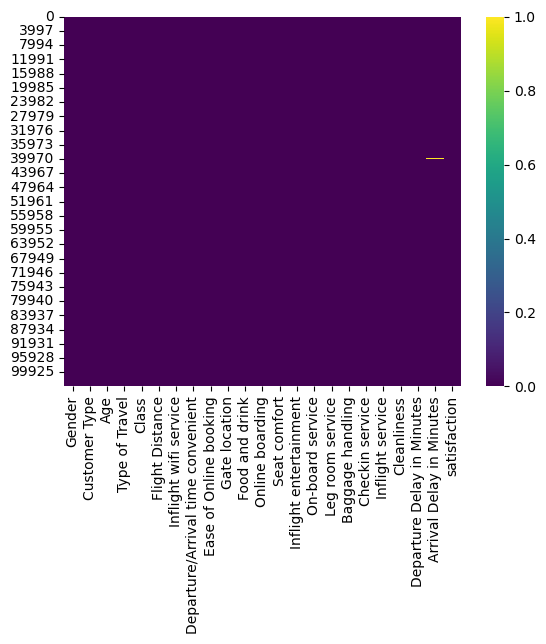

In [13]:
#Using heat map to see clearly about most of Missing Values or Null Values
%matplotlib inline

sns.heatmap(dataset.isna(), cmap='viridis')

In [14]:
dataset.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [15]:
dataset.describe(include="object")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [17]:
# To get better Insight from dataset here we will use panda profiling to do some data analysis

#from pandas_profiling import ProfileReport
#report = ProfileReport(dataset,title='Airline')
#report.to_notebook_iframe()

In [18]:
# Finding the correlation between features. Every feature must be Independent

dataset.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


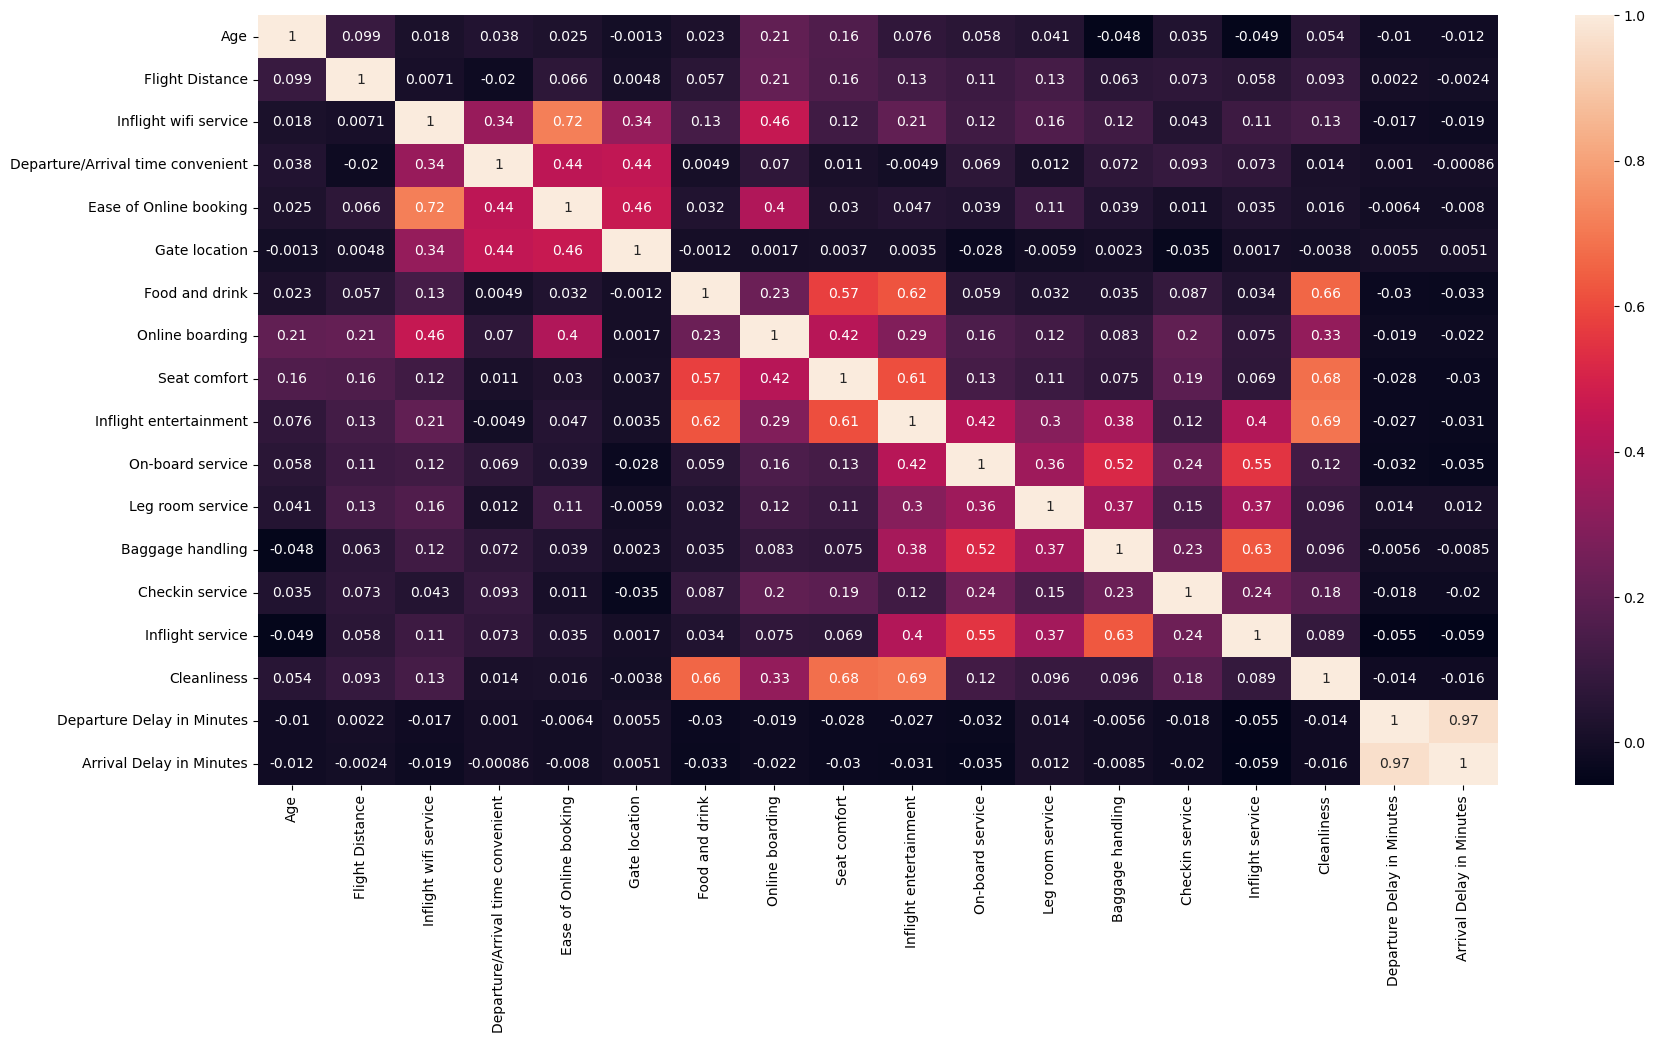

In [19]:
#Visualize in Better way through Heatmap

plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True);

In [20]:
#Data Cleaning and Preprocssing

As we can see that Departure Delay and Arrival Delay in Minutes are highly correlated to each other. If Flight has departure delay then it is obvious that Flight will have arrival delay

Since 'Arrival Delay in Minutes' is 0.97 correlated with 'Departure Delay in Minutes', we will drop this column. Corelated features will not bring additional information but will increase the complexity of the algorithm.

So we can drop "Arrival Delay in Minutes" feature as it contain 310 null rows. Instead of dropping "Departure Delay in Miniutes" we can drop this "Arrival delay in Minutes" feature.  

In [21]:
# dropping the feature which has high co-relations

dataset.drop(columns=["Arrival Delay in Minutes"],inplace=True)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Customer Type                      103904 non-null  object
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  object
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

In [23]:
#changing dtype object column and its data to category 

dataset['Gender'] = dataset["Gender"].astype('category') 
dataset['Customer Type'] = dataset["Customer Type"].astype('category') 
dataset['Type of Travel'] = dataset["Type of Travel"].astype('category')
dataset['Class'] = dataset["Class"].astype('category')
dataset['satisfaction'] = dataset["satisfaction"].astype('category')

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 11  Online boarding           

In [25]:
# Create a LabelEncoder object
lenco = LabelEncoder()

In [26]:
dataset['Gender'] = lenco.fit_transform(dataset['Gender'])
dataset['Customer Type'] = lenco.fit_transform(dataset['Customer Type'])
dataset['Type of Travel'] = lenco.fit_transform(dataset['Type of Travel'])
dataset['Class'] = lenco.fit_transform(dataset['Class'])
dataset['satisfaction'] = lenco.fit_transform(dataset['satisfaction'])

In [27]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1


In [28]:
dataset.iloc[:,6:20].nunique()

Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
dtype: int64

In [29]:
dataset.iloc[:,6:20].describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351
std,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Filling the NA values where customer had not given any review so it represnted as 0. 
To fill those NA values with mean by rounding it

In [30]:
meandata = dataset.iloc[:,6:20].select_dtypes(include=np.number).mean().round()

In [31]:
meandata

Inflight wifi service                3.0
Departure/Arrival time convenient    3.0
Ease of Online booking               3.0
Gate location                        3.0
Food and drink                       3.0
Online boarding                      3.0
Seat comfort                         3.0
Inflight entertainment               3.0
On-board service                     3.0
Leg room service                     3.0
Baggage handling                     4.0
Checkin service                      3.0
Inflight service                     4.0
Cleanliness                          3.0
dtype: float64

In [32]:
dataset.iloc[:,6:20] = dataset.iloc[:,6:20].replace(0,meandata)

In [33]:
dataset.iloc[:,6:20].nunique()

Inflight wifi service                5
Departure/Arrival time convenient    5
Ease of Online booking               5
Gate location                        5
Food and drink                       5
Online boarding                      5
Seat comfort                         5
Inflight entertainment               5
On-board service                     5
Leg room service                     5
Baggage handling                     5
Checkin service                      5
Inflight service                     5
Cleanliness                          5
dtype: int64

In [34]:
# if we want then we can normalize the dataset ! Required opinion of everyone

#using Min_Max_Scaler_Object to normalize the dataset 

scaler = MinMaxScaler()
d = np.array(dataset['Age'])
fd = np.array(dataset['Flight Distance'])
ddm = np.array(dataset['Departure Delay in Minutes'])

d = d.reshape(-1,1)
fd = fd.reshape(-1,1)
ddm = ddm.reshape(-1,1)

#Normalising the dataset

dataset['Age'] = scaler.fit_transform(d)
dataset['Flight Distance'] = scaler.fit_transform(fd)
dataset['Departure Delay in Minutes'] = scaler.fit_transform(ddm)

In [35]:
dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,0.076923,1,2,0.086632,3,4,3,1,...,5,5,4,3,4,4,5,5,0.015704,0
1,1,1,0.230769,0,0,0.041195,3,2,3,3,...,1,1,1,5,3,1,4,1,0.000628,0
2,0,0,0.243590,0,0,0.224354,2,2,2,2,...,5,5,4,3,4,4,4,5,0.000000,1
3,0,0,0.230769,0,0,0.107229,2,5,5,5,...,2,2,2,5,3,1,4,2,0.006910,0
4,1,0,0.692308,0,0,0.036955,3,3,3,3,...,5,3,3,4,4,3,3,3,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0.205128,0,1,0.032512,2,1,2,3,...,2,2,3,1,4,2,3,2,0.001884,0
103900,1,0,0.538462,0,0,0.467690,4,4,4,4,...,5,5,5,5,5,5,5,4,0.000000,1
103901,1,1,0.294872,0,0,0.396607,1,1,1,3,...,5,4,3,2,4,5,5,4,0.004397,0
103902,0,1,0.192308,0,1,0.195679,1,1,1,5,...,1,1,4,5,1,5,4,1,0.000000,0


In [36]:
dataset.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [37]:
X = dataset.iloc[:,:-1]

In [38]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1,0,0.076923,1,2,0.086632,3,4,3,1,...,3,5,5,4,3,4,4,5,5,0.015704
1,1,1,0.230769,0,0,0.041195,3,2,3,3,...,3,1,1,1,5,3,1,4,1,0.000628
2,0,0,0.243590,0,0,0.224354,2,2,2,2,...,5,5,5,4,3,4,4,4,5,0.000000
3,0,0,0.230769,0,0,0.107229,2,5,5,5,...,2,2,2,2,5,3,1,4,2,0.006910
4,1,0,0.692308,0,0,0.036955,3,3,3,3,...,5,5,3,3,4,4,3,3,3,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0.205128,0,1,0.032512,2,1,2,3,...,2,2,2,3,1,4,2,3,2,0.001884
103900,1,0,0.538462,0,0,0.467690,4,4,4,4,...,4,5,5,5,5,5,5,5,4,0.000000
103901,1,1,0.294872,0,0,0.396607,1,1,1,3,...,1,5,4,3,2,4,5,5,4,0.004397
103902,0,1,0.192308,0,1,0.195679,1,1,1,5,...,1,1,1,4,5,1,5,4,1,0.000000


In [39]:
Y = dataset['satisfaction']

In [40]:
Y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int32

In [41]:
#Splitting Dataset in 2 Parts Training and Testing

X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=42)

In [43]:
#Creating a model structure by providing K_value as 3
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(weights='uniform')

#fitting the training dataset to the knn_model

knn_model.fit(X_train, y_train)

#predicting the values by providing 30% testing data so that we can check accuracy of our model by comparing with Y_test data
y_pred = knn_model.predict(X_test)

C:\Users\dhwan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
acc = accuracy_score(y_test, y_pred)
print(f"K_value=3: Accuracy = {acc}")

K_value=3: Accuracy = 0.9187732580520981


In [45]:
#shows the [[TP, FP], [FN, TN]]

confusion_matrix(y_test, y_pred)

array([[16776,   779],
       [ 1753, 11864]], dtype=int64)

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

# y_test is the true class labels (2 for benign, 4 for malignant)
# y_pred is the predicted class 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_pred)

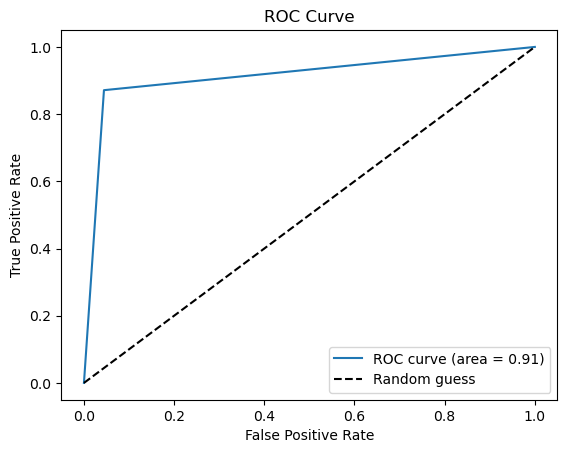

In [47]:
# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()